In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [ ]:
#Downloading MNIST fashion Data
fashion_mnist = keras.datasets.fashion_mnist
#Splitting the data to train and test
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Exploring the** **Data**

In [ ]:
print("shape of training data:",train_images.shape)

shape of training data: (60000, 28, 28)


In [ ]:
print("shape of testing data:",test_images.shape)

shape of testing data: (10000, 28, 28)


In [ ]:
print("Length of training labels:",len(train_labels))

Length of training labels: 60000


**Preprocess the Data**


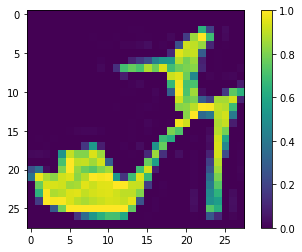

In [ ]:
#checking the first image of training data
plt.figure()
plt.imshow(train_images[9])
plt.colorbar()
plt.show()

In [ ]:
#Scaling the data
train_images = train_images/255.0
test_images = test_images/255.0

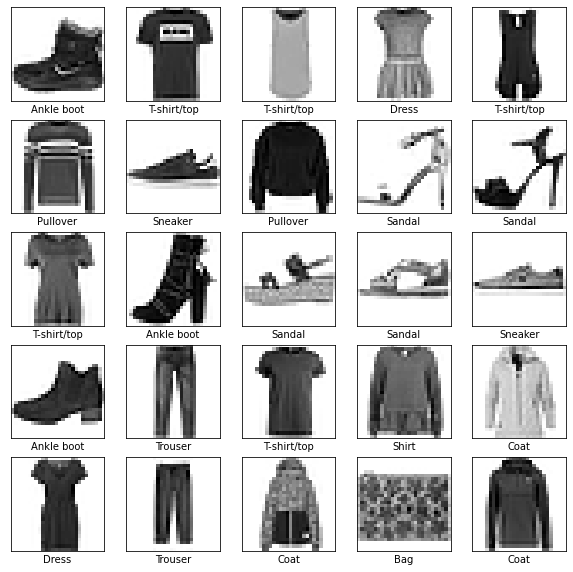

In [ ]:
#scaled images 
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

**Build the model**

*Set up the layers*

*Tiny Model*

In [ ]:
tiny_model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(16, activation="relu"),
                          keras.layers.Dense(10)
])

**Compile the Model**

In [ ]:
tiny_model.compile(optimizer='adam',
                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [ ]:
tiny_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


**Train the Model**


*Fit the Model*

In [ ]:
tiny_model.fit(train_images, train_labels, epochs=10,validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6590 - accuracy: 0.7734 - val_loss: 0.4764 - val_accuracy: 0.8360
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4517 - accuracy: 0.8441 - val_loss: 0.4427 - val_accuracy: 0.8469
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4188 - accuracy: 0.8547 - val_loss: 0.4359 - val_accuracy: 0.8509
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4006 - accuracy: 0.8600 - val_loss: 0.4105 - val_accuracy: 0.8556
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3885 - accuracy: 0.8640 - val_loss: 0.4031 - val_accuracy: 0.8572
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3791 - accuracy: 0.8664 - val_loss: 0.4105 - val_accuracy: 0.8535
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3706 - accuracy: 0.8697 - val_loss: 0.3871 - val_accuracy:

In [ ]:
summary = tiny_model.history.history
summary.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

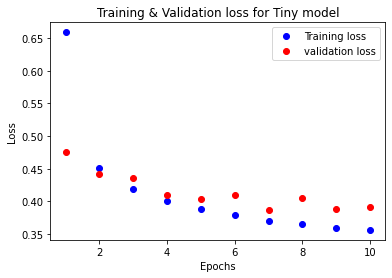

In [ ]:
loss_values = summary['loss']
val_loss = summary['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss_values, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'ro', label = "validation loss")
plt.title('Training & Validation loss for Tiny model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, acc_scr = tiny_model.evaluate(test_images, test_labels, verbose = 2)
print("\nTest Accuracy:", acc_scr)

313/313 - 1s - loss: 0.4205 - accuracy: 0.8519

Test Accuracy: 0.8518999814987183


**Predictions using Tiny Model**

In [ ]:
probability_model = tf.keras.Sequential([tiny_model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([2.7483104e-06, 1.7249336e-05, 1.9420925e-06, 3.5054850e-06,
       1.6838736e-05, 2.8943163e-01, 1.7569491e-04, 7.6312400e-02,
       2.2452453e-03, 6.3179272e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

**Add weight Regularizers**

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
tiny_model2 = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(16, activation="relu",
                                             kernel_regularizer=regularizers.l1_l2(0.1)),
                          keras.layers.Dense(10)
])

In [ ]:
tiny_model2.compile(optimizer='adam',
                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [ ]:
tiny_model2.fit(train_images, train_labels, epochs=10,validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 3.4522 - accuracy: 0.2260 - val_loss: 2.2148 - val_accuracy: 0.2712
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 2.1573 - accuracy: 0.3839 - val_loss: 2.0498 - val_accuracy: 0.4829
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.9705 - accuracy: 0.4969 - val_loss: 1.9053 - val_accuracy: 0.5038
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.8814 - accuracy: 0.5248 - val_loss: 1.8513 - val_accuracy: 0.5660
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.8230 - accuracy: 0.5569 - val_loss: 1.7904 - val_accuracy: 0.5761
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7816 - accuracy: 0.5887 - val_loss: 1.8154 - val_accuracy: 0.5668
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7406 - accuracy: 0.6122 - val_loss: 1.7110 - val_accuracy:

In [ ]:
summary2 = tiny_model2.history.history
summary2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

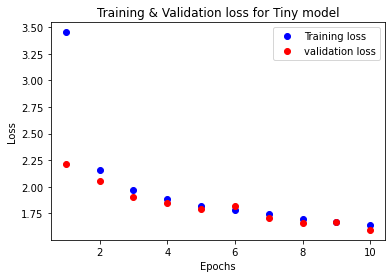

In [ ]:
loss_values = summary2['loss']
val_loss = summary2['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss_values, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'ro', label = "validation loss")
plt.title('Training & Validation loss for Tiny model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, acc_scr = tiny_model2.evaluate(test_images, test_labels, verbose = 2)
print("\nTest Accuracy after Regularization:", acc_scr)

313/313 - 1s - loss: 1.5992 - accuracy: 0.6786

Test Accuracy after Regularization: 0.678600013256073


In [ ]:
probability_model_t = tf.keras.Sequential([tiny_model2,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model_t.predict(test_images)

In [ ]:
predictions[1]

array([2.3126084e-02, 5.4869917e-04, 3.6946696e-01, 3.6328470e-03,
       3.7309730e-01, 2.0120389e-05, 1.5654863e-01, 1.3366981e-07,
       7.3495649e-02, 6.3638712e-05], dtype=float32)

In [ ]:
np.argmax(predictions[4])

0

In [ ]:
test_labels[4]

6

*Medium Model*

In [ ]:
medium_model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation="relu"),                                           
                          keras.layers.Dense(10)
])

In [ ]:
medium_model.compile(optimizer='adam',
                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [ ]:
medium_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
medium_model.fit(train_images, train_labels, epochs=10,validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5147 - accuracy: 0.8182 - val_loss: 0.4117 - val_accuracy: 0.8519
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3831 - accuracy: 0.8621 - val_loss: 0.3711 - val_accuracy: 0.8668
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3417 - accuracy: 0.8733 - val_loss: 0.3767 - val_accuracy: 0.8631
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3185 - accuracy: 0.8833 - val_loss: 0.3779 - val_accuracy: 0.8644
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2981 - accuracy: 0.8899 - val_loss: 0.3346 - val_accuracy: 0.8828
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2822 - accuracy: 0.8960 - val_loss: 0.3488 - val_accuracy: 0.8737
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2689 - accuracy: 0.9012 - val_loss: 0.3297 - val_accuracy:

In [ ]:
summary_m = medium_model.history.history
summary_m.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

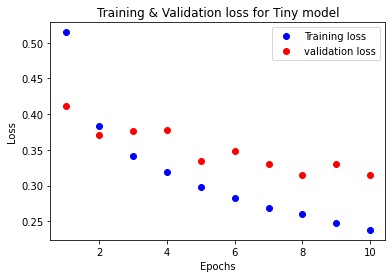

In [ ]:
loss_values = summary_m['loss']
val_loss = summary_m['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss_values, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'ro', label = "validation loss")
plt.title('Training & Validation loss for Tiny model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, acc_scr = medium_model.evaluate(test_images, test_labels, verbose = 2)
print("\nTest Accuracy:", acc_scr)

313/313 - 1s - loss: 0.3402 - accuracy: 0.8844

Test Accuracy: 0.8844000101089478


In [ ]:
probability_model_m = tf.keras.Sequential([medium_model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions_m = probability_model_m(test_images)

In [ ]:
np.argmax(predictions_m[3])

1

In [ ]:
test_labels[3]

1

In [ ]:
medium_model2 = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation="relu",
                                             kernel_regularizer=regularizers.l2(0.1)),
                          keras.layers.Dense(10)
])

In [ ]:
medium_model2.compile(optimizer='adam',
                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [ ]:
medium_model2.fit(train_images, train_labels, epochs=10,validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.4254 - accuracy: 0.7331 - val_loss: 0.8570 - val_accuracy: 0.7684
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9029 - accuracy: 0.7467 - val_loss: 0.9160 - val_accuracy: 0.7518
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8668 - accuracy: 0.7553 - val_loss: 0.8052 - val_accuracy: 0.7728
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8418 - accuracy: 0.7602 - val_loss: 0.7909 - val_accuracy: 0.7805
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8148 - accuracy: 0.7704 - val_loss: 0.7864 - val_accuracy: 0.7849
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.8013 - accuracy: 0.7735 - val_loss: 0.8156 - val_accuracy: 0.7476
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7885 - accuracy: 0.7773 - val_loss: 0.7629 - val_accuracy:

In [ ]:
summary_m2 = medium_model2.history.history
summary_m2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

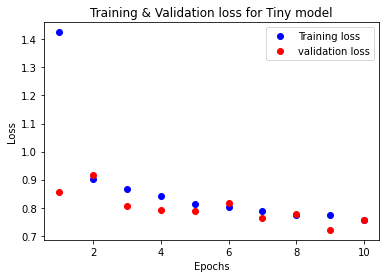

In [ ]:
loss_values = summary_m2['loss']
val_loss = summary_m2['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss_values, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'ro', label = "validation loss")
plt.title('Training & Validation loss for Tiny model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, acc_scr = medium_model2.evaluate(test_images, test_labels, verbose = 2)
print("\nTest Accuracy after Regularization:", acc_scr)

313/313 - 1s - loss: 0.7794 - accuracy: 0.7737

Test Accuracy after Regularization: 0.7736999988555908


In [ ]:
probability_model_m1 = tf.keras.Sequential([medium_model2,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions_m2 = probability_model_m1(test_images)

In [ ]:
np.argmax(predictions_m2[121])

0

In [ ]:
test_labels[121]

0

**Large Model**

In [ ]:
large_model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(512, activation="relu"),                                           
                          keras.layers.Dense(10)
])

In [ ]:
large_model.compile(optimizer='adam',
                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [ ]:
large_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
large_model.fit(train_images, train_labels, epochs=10,validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4937 - accuracy: 0.8233 - val_loss: 0.3984 - val_accuracy: 0.8576
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3718 - accuracy: 0.8638 - val_loss: 0.3770 - val_accuracy: 0.8666
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3310 - accuracy: 0.8764 - val_loss: 0.3484 - val_accuracy: 0.8721
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3069 - accuracy: 0.8871 - val_loss: 0.3380 - val_accuracy: 0.8764
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2874 - accuracy: 0.8927 - val_loss: 0.3272 - val_accuracy: 0.8850
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2709 - accuracy: 0.8997 - val_loss: 0.3331 - val_accuracy: 0.8823
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2559 - accuracy: 0.9041 - val_loss: 0.3203 - val_accuracy:

In [ ]:
summary_l = large_model.history.history
summary_l.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

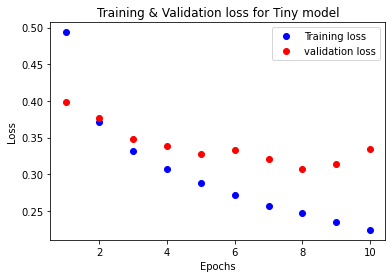

In [ ]:
loss_values = summary_l['loss']
val_loss = summary_l['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss_values, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'ro', label = "validation loss")
plt.title('Training & Validation loss for Tiny model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, acc_scr = large_model.evaluate(test_images, test_labels, verbose = 2)
print("\nTest Accuracy:", acc_scr)

313/313 - 1s - loss: 0.3676 - accuracy: 0.8771

Test Accuracy: 0.8770999908447266


In [ ]:
probability_model_l = tf.keras.Sequential([large_model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions_l = probability_model_l(test_images)

In [ ]:
np.argmax(predictions_l[2])

1

In [ ]:
test_labels[2]

1

In [ ]:
large_model2 = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(512, activation="relu",
                                             kernel_regularizer=regularizers.l2(0.1)),
                          keras.layers.Dense(10)
])

In [ ]:
large_model2.compile(optimizer='adam',
                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [ ]:
large_model2.fit(train_images, train_labels, epochs=10,validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.9316 - accuracy: 0.7071 - val_loss: 0.9865 - val_accuracy: 0.7150
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9706 - accuracy: 0.7289 - val_loss: 0.9110 - val_accuracy: 0.7623
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9294 - accuracy: 0.7380 - val_loss: 0.8200 - val_accuracy: 0.7722
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8813 - accuracy: 0.7502 - val_loss: 0.9126 - val_accuracy: 0.7637
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8440 - accuracy: 0.7603 - val_loss: 0.9150 - val_accuracy: 0.7250
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8259 - accuracy: 0.7682 - val_loss: 0.8049 - val_accuracy: 0.7784
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8147 - accuracy: 0.7702 - val_loss: 0.8345 - val_accuracy:

In [ ]:
summary_l2 = large_model2.history.history
summary_l2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

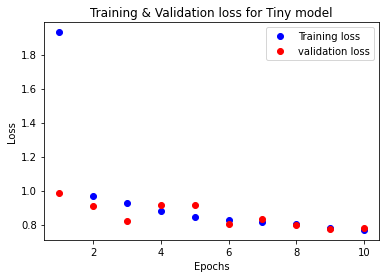

In [ ]:
loss_values = summary_l2['loss']
val_loss = summary_l2['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss_values, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'ro', label = "validation loss")
plt.title('Training & Validation loss for Tiny model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, acc_scr = large_model2.evaluate(test_images, test_labels, verbose = 2)
print("\nTest Accuracy after Regularization:", acc_scr)

313/313 - 1s - loss: 0.7952 - accuracy: 0.7646

Test Accuracy after Regularization: 0.7645999789237976


In [ ]:
probability_model_l1 = tf.keras.Sequential([large_model2,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions_l2 = probability_model_l1(test_images)

In [ ]:
np.argmax(predictions_l2[121])

0

In [ ]:
test_labels[121]

0